In [1]:
!pip install fastai

     ------------------------------------ 225.5/225.5 kB 983.0 kB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 12.0/12.0 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 161.9/161.9 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 95.4/95.4 kB ? eta 0:00:00
     ------------------------------------- 449.0/449.0 kB 14.2 MB/s eta 0:00:00
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
     ---------------------------------------- 58.6/58.6 kB 3.2 MB/s e

Keyring is skipped due to an exception: 'keyring.backends'


In [2]:
from fastai.vision.all import *

In [4]:
path = 'D:\\Projects\\Cap Pro\\Dataset'
size = 224
bs = 64

In [5]:
data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(224),
                 batch_tfms=aug_transforms())

In [6]:
dls = data.dataloaders(path,bs=64)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

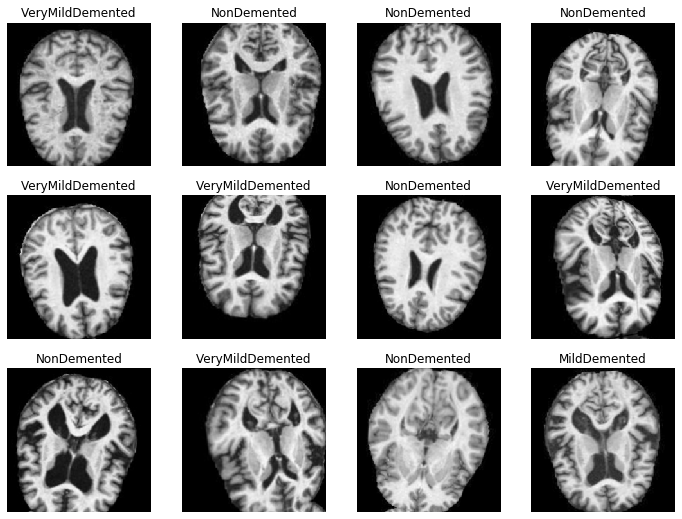

In [7]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [8]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

C:\All the packages\Anaconda\lib\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\All the packages\Anaconda\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
C:\All the packages\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.

epoch,train_loss,valid_loss,accuracy,time
0,1.879861,1.261271,0.553125,22:48


epoch,train_loss,valid_loss,accuracy,time
0,1.256649,0.835526,0.653906,28:14
1,1.042455,0.785571,0.670313,28:28
2,0.859955,0.638306,0.717188,29:11
3,0.661498,0.479344,0.797656,6:12:00
4,0.520907,0.634514,0.750781,26:28
5,0.396079,0.320010,0.878906,26:14
6,0.298667,0.257266,0.896875,26:19
7,0.194207,0.225316,0.919531,26:15
8,0.145531,0.165211,0.936719,26:13
9,0.124576,0.168128,0.934375,26:14


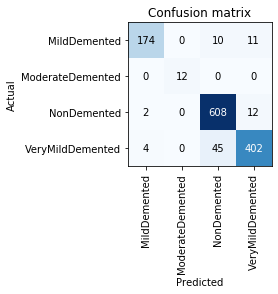

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

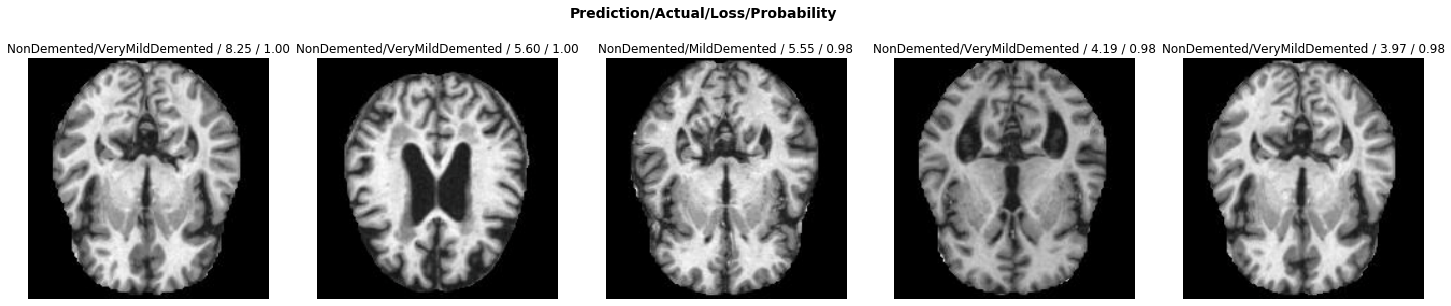

In [10]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [11]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [12]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [14]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [15]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
learn.predict("../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27.jpg")

In [16]:
from random import randint as r

def check_acc_for_ModerateDemented():
    check_base_check_acc_for_ModerateDemented = 'D:\\Projects\\Cap Pro\\Dataset\\ModerateDemented\\' + str(r(0,100)) + ".jpg"
    return learn.predict(check_base_check_acc_for_ModerateDemented)

def check_acc_for_NonDemented():
    check_base_check_acc_for_NonDemented = 'D:\\Projects\\Cap Pro\\Dataset\\NonDemented\\' + str(r(0,100)) + ".jpg"
    return learn.predict(check_base_check_acc_for_NonDemented)

def check_acc_for_VeryMildDemented():
    check_base_check_acc_for_VeryMildDemented = 'D:\\Projects\\Cap Pro\\Dataset\\VeryMildDemented\\' + str(r(0,100)) + ".jpg"
    return learn.predict(check_base_check_acc_for_VeryMildDemented)

def check_acc_for_MildDemented():
    check_base_check_acc_for_MildDemented = 'D:\\Projects\\Cap Pro\\Dataset\\MildDemented\\' + str(r(0,100)) + ".jpg"
    return learn.predict(check_base_check_acc_for_MildDemented)

In [18]:
for i in range(50):
    print(check_acc_for_ModerateDemented)
    print(check_acc_for_NonDemented)
    print(check_acc_for_VeryMildDemented)
    print(check_acc_for_MildDemented)

<function check_acc_for_ModerateDemented at 0x000002218000B5E8>
<function check_acc_for_NonDemented at 0x000002218000BAF8>
<function check_acc_for_VeryMildDemented at 0x000002218000BC18>
<function check_acc_for_MildDemented at 0x000002218000BF78>
<function check_acc_for_ModerateDemented at 0x000002218000B5E8>
<function check_acc_for_NonDemented at 0x000002218000BAF8>
<function check_acc_for_VeryMildDemented at 0x000002218000BC18>
<function check_acc_for_MildDemented at 0x000002218000BF78>
<function check_acc_for_ModerateDemented at 0x000002218000B5E8>
<function check_acc_for_NonDemented at 0x000002218000BAF8>
<function check_acc_for_VeryMildDemented at 0x000002218000BC18>
<function check_acc_for_MildDemented at 0x000002218000BF78>
<function check_acc_for_ModerateDemented at 0x000002218000B5E8>
<function check_acc_for_NonDemented at 0x000002218000BAF8>
<function check_acc_for_VeryMildDemented at 0x000002218000BC18>
<function check_acc_for_MildDemented at 0x000002218000BF78>
<function ch